# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
import os
import numpy as np
#import requests
import pickle
from astropy.time import Time
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


AttributeError: ignored

In [ ]:
%matplotlib inline

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

# import and process data

In [ ]:
# use pandas or astropy.io to import flare database file created

flares_data = pd.read_csv("/content/drive/MyDrive/Flares_data/flares_data_new.csv")

flares_data
# NOTE: here time JD is the start time in JD

,Flare,Start,time,Peak,End,Dur (s),Peak (c/s),Total Counts,Energy (KeV),X Pos (asec),Y Pos (asec),Radial (asec),AR,time JD,Peak JD,End JD,Flags
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,2.452318e+06,2.452318e+06,2.452318e+06,"A1, P1"
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,2.452318e+06,2.452318e+06,2.452318e+06,"A1, P1, PE, Q1"
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,2.452319e+06,2.452319e+06,2.452319e+06,"A1, P1"
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400,12-25,-277,378,469,9822,2.452319e+06,2.452319e+06,2.452319e+06,"A1, P1"
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392,25-50,-272,390,476,9825,2.452319e+06,2.452319e+06,2.452319e+06,"A1, GS, P1, PE, Q2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121201,18020903,2018-02-09,16:41:28,16:42:54,16:43:32,124,18,2888,6-12,-345,-38,347,2699,2.458159e+06,2.458159e+06,2.458159e+06,"A0, DF, P1, PE, Q2"
121202,18020904,2018-02-09,18:15:56,18:17:26,18:17:40,104,16,1656,6-12,-268,-38,271,2699,2.458159e+06,2.458159e+06,2.458159e+06,"A0, DF, P1, PE, Q2"
121203,18021001,2018-02-10,13:04:36,13:06:46,13:07:04,148,15,2224,6-12,-115,-38,121,2699,2.458160e+06,2.458160e+06,2.458160e+06,"A0, DF, P1, PE, Q2"
121204,18022601,2018-02-26,15:49:56,15:51:18,15:53:52,236,16,3312,6-12,115,192,223,2700,2.458176e+06,2.458176e+06,2.458176e+06,"A0, DF, P1, PE, Q2"


In [ ]:
# read https://ianlondon.github.io/blog/pickling-basics/ for hints to importing pickle file
with open('/content/drive/MyDrive/spectroscopy_data/fluxes_pca_1000.pic', 'rb') as f:
    spec_data = pickle.load(f)

In [ ]:
print(spec_data)
# spec_data is a tuple

(array([[-8.49790715e+01,  2.78063156e+00,  5.02759386e+00, ...,
         1.54104253e+00,  1.88517500e+00, -1.18954765e+00],
       [-8.80927122e+01, -1.08064105e+01, -4.53335676e+00, ...,
        -3.80381247e-01, -8.01557076e-01, -7.24010371e-02],
       [-8.96586662e+01, -3.00423251e+00,  2.59725344e+00, ...,
         1.18284436e+00, -1.84130574e+00,  4.07063992e-01],
       ...,
       [ 6.13017331e+01, -1.39605891e+01, -3.43931520e+01, ...,
         2.22195275e+00,  2.00187693e+00, -1.60701328e+00],
       [ 7.15419375e+01, -2.59350936e+01, -4.08936493e+01, ...,
        -8.30893903e-01,  6.42957227e-01,  1.43601323e+00],
       [ 6.96396606e+01, -2.82564187e+01, -4.71730641e+01, ...,
        -3.71738198e-01, -1.65176322e+00,  1.02304173e+00]]), array([2457259.15708069, 2457259.14581096, 2457259.14955971, ...,
       2457968.07208936, 2457968.12101696, 2457968.09469479]), array([6400.01659489, 6400.03410052, 6400.05160619, ..., 6699.94614955,
       6699.96447554, 6699.98280159]), a

In [ ]:
len(spec_data)
# each item in the tuple spec_data corresponds to fluxes_pca_n1000, BJD_times, wls, start_times, end_times, exp_times

6

In [ ]:
# spectroscopy
fluxes_pca_n1000 = pd.DataFrame(spec_data[0]) #fluxes_pca_n1000
fluxes_pca_n1000

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-84.979071,2.780632,5.027594,4.630345,-3.077675,-8.092379,5.175961,-0.148532,-3.699574,0.973676,...,0.508552,0.209834,-2.554902,-2.388718,0.890786,-0.763986,-2.593909,1.541043,1.885175,-1.189548
1,-88.092712,-10.806411,-4.533357,-4.755574,-3.986331,-4.661569,3.740120,0.933008,-3.998854,2.180481,...,1.180034,0.410540,1.569518,0.488170,-0.185511,-1.475507,1.896597,-0.380381,-0.801557,-0.072401
2,-89.658666,-3.004233,2.597253,2.547066,-3.981803,-6.915239,2.425258,0.824539,-4.147802,1.565901,...,-0.878632,1.240639,-0.234370,0.591164,1.672760,-0.676875,-0.591746,1.182844,-1.841306,0.407064
3,-31.159773,3.373630,61.811221,6.573724,-4.840065,-6.527008,-1.407515,3.988328,-3.796534,-3.897588,...,1.889540,-1.007316,-0.045964,0.286508,-1.066184,-1.690181,-1.313808,1.808223,0.736122,1.834870
4,-84.508186,9.246745,10.256738,10.628996,-2.256510,-9.815517,4.897512,-0.480226,-4.064657,0.451797,...,-2.393831,-0.717362,-2.721441,1.000767,-0.533977,1.374713,0.984960,-0.536170,-2.118400,-0.722989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,69.023701,-11.309955,-30.768861,-3.205727,-2.473293,-0.752610,12.228631,3.748803,2.946426,-0.683445,...,-1.036945,-2.609787,0.866429,-4.205350,-0.063991,-0.158525,3.547329,-1.312987,0.790178,-2.769274
2290,72.430360,-17.843259,-27.480625,-14.477272,-1.088229,3.138586,-0.212559,3.644992,4.721468,2.209880,...,-1.245859,-0.655350,-0.585315,-0.489759,0.872004,0.622886,0.533670,-0.531018,-0.649661,-0.780785
2291,61.301733,-13.960589,-34.393152,-5.537749,-0.024028,1.296510,6.148991,1.933477,4.288119,0.663477,...,1.455961,0.492508,1.250992,1.181817,-1.869861,-0.446073,1.719794,2.221953,2.001877,-1.607013
2292,71.541937,-25.935094,-40.893649,-19.775153,-2.684880,0.038022,11.301934,2.795275,3.669332,1.681598,...,-0.287645,-1.034527,-0.331280,0.941196,1.516175,1.753613,-1.879527,-0.830894,0.642957,1.436013


## Check size of fluxes_pca_n1000

In [ ]:
fluxes_pca_n1000.shape


(2294, 1000)

In [ ]:
exp_times = pd.DataFrame(spec_data[5])
exp_times

,0
0,300.0
1,300.0
2,300.0
3,300.0
4,300.0
...,...
2289,300.0
2290,300.0
2291,300.0
2292,300.0


## Convert exptime in seconds to days

In [ ]:
# divide the time value by 86400

exp_times = exp_times.copy()/86400

exp_times


,0
0,0.003472
1,0.003472
2,0.003472
3,0.003472
4,0.003472
...,...
2289,0.003472
2290,0.003472
2291,0.003472
2292,0.003472


In [ ]:
exp_time = exp_times[0].iat[0]/2
exp_time

0.001736111111111111

## Calculate for solar spectra, start jd and end jd using BJD_times and exptime

In [ ]:
# extract BJD times
BJD_times = pd.DataFrame(spec_data[1])

# add exp_time to BJD time to get end time
end_times = BJD_times + exp_time

# Subtract exp_time from BJD time to get start time
start_times = BJD_times - exp_time

start_times


,0
0,2.457259e+06
1,2.457259e+06
2,2.457259e+06
3,2.457260e+06
4,2.457259e+06
...,...
2289,2.457968e+06
2290,2.457968e+06
2291,2.457968e+06
2292,2.457968e+06


# Correlate flare data with solar spectra

In [ ]:
# go through each date of the solar spectra

  # combine fluxes_n1000, BJD_times, start_times, end_times into 1 data frame/add new columns to flu

fluxes = fluxes_pca_n1000.copy()
fluxes['BJD times'] = BJD_times
fluxes['Start times'] = start_times
fluxes['End times'] = end_times

fluxes


,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,BJD times,Start times,End times
0,-84.979071,2.780632,5.027594,4.630345,-3.077675,-8.092379,5.175961,-0.148532,-3.699574,0.973676,...,-2.388718,0.890786,-0.763986,-2.593909,1.541043,1.885175,-1.189548,2.457259e+06,2.457259e+06,2.457259e+06
1,-88.092712,-10.806411,-4.533357,-4.755574,-3.986331,-4.661569,3.740120,0.933008,-3.998854,2.180481,...,0.488170,-0.185511,-1.475507,1.896597,-0.380381,-0.801557,-0.072401,2.457259e+06,2.457259e+06,2.457259e+06
2,-89.658666,-3.004233,2.597253,2.547066,-3.981803,-6.915239,2.425258,0.824539,-4.147802,1.565901,...,0.591164,1.672760,-0.676875,-0.591746,1.182844,-1.841306,0.407064,2.457259e+06,2.457259e+06,2.457259e+06
3,-31.159773,3.373630,61.811221,6.573724,-4.840065,-6.527008,-1.407515,3.988328,-3.796534,-3.897588,...,0.286508,-1.066184,-1.690181,-1.313808,1.808223,0.736122,1.834870,2.457260e+06,2.457260e+06,2.457260e+06
4,-84.508186,9.246745,10.256738,10.628996,-2.256510,-9.815517,4.897512,-0.480226,-4.064657,0.451797,...,1.000767,-0.533977,1.374713,0.984960,-0.536170,-2.118400,-0.722989,2.457259e+06,2.457259e+06,2.457259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,69.023701,-11.309955,-30.768861,-3.205727,-2.473293,-0.752610,12.228631,3.748803,2.946426,-0.683445,...,-4.205350,-0.063991,-0.158525,3.547329,-1.312987,0.790178,-2.769274,2.457968e+06,2.457968e+06,2.457968e+06
2290,72.430360,-17.843259,-27.480625,-14.477272,-1.088229,3.138586,-0.212559,3.644992,4.721468,2.209880,...,-0.489759,0.872004,0.622886,0.533670,-0.531018,-0.649661,-0.780785,2.457968e+06,2.457968e+06,2.457968e+06
2291,61.301733,-13.960589,-34.393152,-5.537749,-0.024028,1.296510,6.148991,1.933477,4.288119,0.663477,...,1.181817,-1.869861,-0.446073,1.719794,2.221953,2.001877,-1.607013,2.457968e+06,2.457968e+06,2.457968e+06
2292,71.541937,-25.935094,-40.893649,-19.775153,-2.684880,0.038022,11.301934,2.795275,3.669332,1.681598,...,0.941196,1.516175,1.753613,-1.879527,-0.830894,0.642957,1.436013,2.457968e+06,2.457968e+06,2.457968e+06


In [ ]:
# convert start and end times to JD 

# each item in the tuple spec_data corresponds to fluxes_pca_n1000, BJD_times, wls, start_times, end_times, exp_times


# start time 
JD_start = spec_data[3].tolist()
t1 = Time(JD_start,format = 'iso', scale = 'utc')

Start_JD = pd.Series(t1.jd)
fluxes['JD start'] = Start_JD.values

# end time
JD_end = spec_data[4].tolist()
t2 = Time(JD_end,format = 'iso', scale = 'utc')

End_JD = pd.Series(t2.jd)
fluxes['JD end'] = End_JD.values

fluxes

,0,1,2,3,4,5,6,7,8,9,...,995,996,997,998,999,BJD times,Start times,End times,JD start,JD end
0,-84.979071,2.780632,5.027594,4.630345,-3.077675,-8.092379,5.175961,-0.148532,-3.699574,0.973676,...,-0.763986,-2.593909,1.541043,1.885175,-1.189548,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06
1,-88.092712,-10.806411,-4.533357,-4.755574,-3.986331,-4.661569,3.740120,0.933008,-3.998854,2.180481,...,-1.475507,1.896597,-0.380381,-0.801557,-0.072401,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06
2,-89.658666,-3.004233,2.597253,2.547066,-3.981803,-6.915239,2.425258,0.824539,-4.147802,1.565901,...,-0.676875,-0.591746,1.182844,-1.841306,0.407064,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06
3,-31.159773,3.373630,61.811221,6.573724,-4.840065,-6.527008,-1.407515,3.988328,-3.796534,-3.897588,...,-1.690181,-1.313808,1.808223,0.736122,1.834870,2.457260e+06,2.457260e+06,2.457260e+06,2.457260e+06,2.457260e+06
4,-84.508186,9.246745,10.256738,10.628996,-2.256510,-9.815517,4.897512,-0.480226,-4.064657,0.451797,...,1.374713,0.984960,-0.536170,-2.118400,-0.722989,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,69.023701,-11.309955,-30.768861,-3.205727,-2.473293,-0.752610,12.228631,3.748803,2.946426,-0.683445,...,-0.158525,3.547329,-1.312987,0.790178,-2.769274,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06
2290,72.430360,-17.843259,-27.480625,-14.477272,-1.088229,3.138586,-0.212559,3.644992,4.721468,2.209880,...,0.622886,0.533670,-0.531018,-0.649661,-0.780785,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06
2291,61.301733,-13.960589,-34.393152,-5.537749,-0.024028,1.296510,6.148991,1.933477,4.288119,0.663477,...,-0.446073,1.719794,2.221953,2.001877,-1.607013,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06
2292,71.541937,-25.935094,-40.893649,-19.775153,-2.684880,0.038022,11.301934,2.795275,3.669332,1.681598,...,1.753613,-1.879527,-0.830894,0.642957,1.436013,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06


In [ ]:
# Using zip() and enumerate()
# NOTE: zip() allows you to loop over multiple iterables in parallel, enumerate() gives you back two loop variables count & value 
# of the item at the current iteration

# loop through the date of solar spectra first

# add an empty new column to dataframe fluxes
fluxes['Labels'] = ""

flare_start_times = flares_data['time JD']
flare_peak_times = flares_data['Peak JD']
flare_end_times = flares_data['End JD']
""
spectra_start_times = fluxes['JD start']
spectra_end_times = fluxes['JD end']


In [ ]:
spec_data[3] # start times

# extract dates from start times 

dates = []

for time in spec_data[3]:
  ind = time.index(' ')
  dates.append(time[:ind])

print(dates)


['2015-08-24', '2015-08-24', '2015-08-24', '2015-08-25', '2015-08-24', '2015-08-25', '2015-08-24', '2015-08-24', '2015-08-24', '2015-08-25', '2015-08-25', '2015-08-25', '2015-08-24', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-11', '2017-08-11', '2017-08-11', '2017-08-11', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-27', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-27', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015-08-26', '2015

In [ ]:
fluxes['dates'] = dates

fluxes

,0,1,2,3,4,5,6,7,8,9,...,997,998,999,BJD times,Start times,End times,JD start,JD end,Labels,dates
0,-84.979071,2.780632,5.027594,4.630345,-3.077675,-8.092379,5.175961,-0.148532,-3.699574,0.973676,...,1.541043,1.885175,-1.189548,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,,2015-08-24
1,-88.092712,-10.806411,-4.533357,-4.755574,-3.986331,-4.661569,3.740120,0.933008,-3.998854,2.180481,...,-0.380381,-0.801557,-0.072401,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,,2015-08-24
2,-89.658666,-3.004233,2.597253,2.547066,-3.981803,-6.915239,2.425258,0.824539,-4.147802,1.565901,...,1.182844,-1.841306,0.407064,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,,2015-08-24
3,-31.159773,3.373630,61.811221,6.573724,-4.840065,-6.527008,-1.407515,3.988328,-3.796534,-3.897588,...,1.808223,0.736122,1.834870,2.457260e+06,2.457260e+06,2.457260e+06,2.457260e+06,2.457260e+06,,2015-08-25
4,-84.508186,9.246745,10.256738,10.628996,-2.256510,-9.815517,4.897512,-0.480226,-4.064657,0.451797,...,-0.536170,-2.118400,-0.722989,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,2.457259e+06,,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,69.023701,-11.309955,-30.768861,-3.205727,-2.473293,-0.752610,12.228631,3.748803,2.946426,-0.683445,...,-1.312987,0.790178,-2.769274,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,,2017-08-02
2290,72.430360,-17.843259,-27.480625,-14.477272,-1.088229,3.138586,-0.212559,3.644992,4.721468,2.209880,...,-0.531018,-0.649661,-0.780785,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,,2017-08-02
2291,61.301733,-13.960589,-34.393152,-5.537749,-0.024028,1.296510,6.148991,1.933477,4.288119,0.663477,...,2.221953,2.001877,-1.607013,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,,2017-08-02
2292,71.541937,-25.935094,-40.893649,-19.775153,-2.684880,0.038022,11.301934,2.795275,3.669332,1.681598,...,-0.830894,0.642957,1.436013,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,2.457968e+06,,2017-08-02


In [ ]:
# make a copy of fluxes
fluxes_1 = fluxes.copy()

In [ ]:
# check whether peak time of flare is between the start time and end time of the solar spectra observation

# label each spectrum based on the date...?

# Strong flares: general structure of loop
# ---> extract from flares_data all the dates that have strong solar flares 
# ---> check date of spectrum 
# --> find corresponding date in flares_data
# --> check whether peak time is within the range of observation time of spectrum
# --> assign labels to dates 1. Strong flare start 2. Strong flare peak 3. Strong flsre end

# Repeat the process with Weak flares

# No flares

#######################################################
# add an empty new column to dataframe fluxes
fluxes_1['Labels'] = ""
labels = fluxes_1['Labels']
Energy = flares_data['Energy (KeV)']
obs_dates = fluxes_1['dates']
flare_dates = flares_data['Start']

labels_1 = labels.copy()

0        
1        
2        
3        
4        
       ..
2289     
2290     
2291     
2292     
2293     
Name: Labels, Length: 2294, dtype: object

In [ ]:
# no flare
no_flares = flares_data.copy()

remove_indices_2 = []
for count, value in enumerate(Energy): # count gives row index
  if value != '3-6':
    remove_indices_2.append(count)

no_flares = no_flares.drop(remove_indices_2)
 



In [ ]:
# labeling, no flare

for date in no_flares['Start']:
      # find row index of obs_start
      row_ind_2 = fluxes_1.index[fluxes_1['dates'] == date].tolist()
      # add label to the column labels at the correct row index
      labels_1[row_ind_2] = 'no flare'

fluxes_1.shape


(2294, 1007)

In [ ]:
# make no flares the default option
# loop over each item in fluxes_1 and make all the labels 'no flares'

# for date in fluxes_1['Start times']:
#       # find row index of obs_start
#       row_ind_2 = fluxes_1.index[date].tolist()
#       # add label to the column labels at the correct row index
#       labels_1[row_ind_2] = 'no flare'

for ind in range(len(fluxes_1['JD start'])):
  labels_1[ind] = 'no flare'


In [ ]:
# Weak flares
# extract from flares_data all the dates and peak times that have weak solar flares 
# make a new dataframe (remove rows that are not solar flares)

flares_data_weak = flares_data.copy()

remove_indices_1 = []
for count, value in enumerate(Energy): # count gives row index
  if value != '6-12':
    remove_indices_1.append(count)

flares_data_weak = flares_data_weak.drop(remove_indices_1)

In [ ]:
flares_data_weak

,Flare,Start,time,Peak,End,Dur (s),Peak (c/s),Total Counts,Energy (KeV),X Pos (asec),Y Pos (asec),Radial (asec),AR,time JD,Peak JD,End JD,Flags
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,2.452318e+06,2.452318e+06,2.452318e+06,"A1, P1, PE, Q1"
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,2.452319e+06,2.452319e+06,2.452319e+06,"A1, P1"
6,2021354,2002-02-13,07:20:56,07:22:42,07:30:04,548,28,52488,6-12,-267,390,473,9825,2.452319e+06,2.452319e+06,2.452319e+06,"A1, P1"
8,2021339,2002-02-13,10:02:56,10:04:42,10:04:44,108,26,10368,6-12,-235,390,455,9822,2.452319e+06,2.452319e+06,2.452319e+06,"A1, P1, PE, Q2, SE"
14,2021413,2002-02-14,10:06:44,10:09:42,10:10:36,232,60,39168,6-12,-135,310,338,0,2.452320e+06,2.452320e+06,2.452320e+06,"A1, GE, P1, PE, Q2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121201,18020903,2018-02-09,16:41:28,16:42:54,16:43:32,124,18,2888,6-12,-345,-38,347,2699,2.458159e+06,2.458159e+06,2.458159e+06,"A0, DF, P1, PE, Q2"
121202,18020904,2018-02-09,18:15:56,18:17:26,18:17:40,104,16,1656,6-12,-268,-38,271,2699,2.458159e+06,2.458159e+06,2.458159e+06,"A0, DF, P1, PE, Q2"
121203,18021001,2018-02-10,13:04:36,13:06:46,13:07:04,148,15,2224,6-12,-115,-38,121,2699,2.458160e+06,2.458160e+06,2.458160e+06,"A0, DF, P1, PE, Q2"
121204,18022601,2018-02-26,15:49:56,15:51:18,15:53:52,236,16,3312,6-12,115,192,223,2700,2.458176e+06,2.458176e+06,2.458176e+06,"A0, DF, P1, PE, Q2"


In [ ]:
weak_flare_peak_times = flares_data_weak['Peak JD']
weak_flare_start_times = flares_data_weak['time JD']
weak_flare_end_times = flares_data_weak['End JD']

for obs_start, obs_end in zip(spectra_start_times, spectra_end_times):
  for flare_peak, flare_start, flare_end in zip(weak_flare_peak_times, weak_flare_start_times, weak_flare_end_times):
    if flare_peak >= obs_start and flare_peak <= obs_end: # peak time of flare is within start time and end time of observation/date range contains a peak
      # find row index of obs_start
      row_ind_1 = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
      labels_1[row_ind_1] = 'weak flare peak'
    elif flare_start >= obs_start and flare_start <= obs_end: # time range contains start of a flare
      # find row index of obs_start
      row_ind_1 = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
      labels_1[row_ind_1] = 'weak flare start'
    elif flare_end >= obs_start and flare_end <= obs_end: # time range contain the end of a flare
      # find row index of obs_start
      row_ind_1 = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
      labels_1[row_ind_1] = 'weak flare end'

In [ ]:
# extract from flares_data all the dates and peak times that have strong solar flares 
# make a new dataframe (remove rows that are not strong flares)

flares_data_strong = flares_data.copy()

remove_indices = []
for count, value in enumerate(Energy): # count gives row index
  if value == '3-6':
    remove_indices.append(count)
  elif value =='6-12':
    remove_indices.append(count)
    
flares_data_strong = flares_data_strong.drop(remove_indices)

In [ ]:
strong_flare_peak_times = flares_data_strong['Peak JD']
strong_flare_start_times = flares_data_strong['time JD']
strong_flare_end_times = flares_data_strong['End JD']

for obs_start, obs_end in zip(spectra_start_times, spectra_end_times):
  for flare_peak, flare_start, flare_end in zip(strong_flare_peak_times, strong_flare_start_times, strong_flare_end_times):
    if flare_peak >= obs_start and flare_peak <= obs_end: # peak time of flare is within start time and end time of observation/date range contains a peak
      # find row index of obs_start
      row_ind = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
      labels_1[row_ind] = 'strong flare peak'
    elif flare_start >= obs_start and flare_start <= obs_end: # time range contains start of a flare
      # find row index of obs_start
      row_ind = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
      labels_1[row_ind] = 'strong flare start'
    elif flare_end >= obs_start and flare_end <= obs_end: # time range contain the end of a flare
      # find row index of obs_start
      row_ind = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
      labels_1[row_ind] = 'strong flare end'

fluxes_1['Labels'] = labels_1
labels_1

0       strong flare start
1        strong flare peak
2         strong flare end
3                 no flare
4        strong flare peak
               ...        
2289              no flare
2290              no flare
2291              no flare
2292              no flare
2293              no flare
Name: Labels, Length: 2294, dtype: object

In [ ]:
# check results (after converting time to JD)

fluxes_1['Labels'].value_counts()

no flare              1982
weak flare peak        119
weak flare start        51
weak flare end          49
strong flare peak       40
strong flare start      27
strong flare end        26
Name: Labels, dtype: int64

In [ ]:
# check results (original BJD time)

fluxes_1['Labels'].value_counts()

no flare              1993
weak flare peak        121
weak flare end          54
weak flare start        42
strong flare peak       40
strong flare end        24
strong flare start      20
Name: Labels, dtype: int64

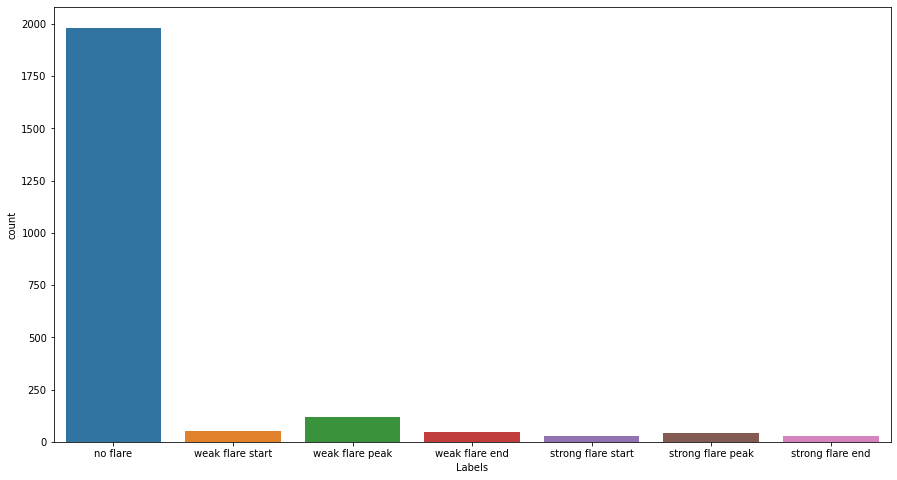

In [ ]:
# bar plot

countplt, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x="Labels", data=fluxes_1, order = ('no flare', 'weak flare start', 'weak flare peak', 'weak flare end', 'strong flare start', 'strong flare peak', 'strong flare end'))

In [ ]:
fluxes_1.to_csv("fluxes_labeled_JD.csv", index = False) 

In [ ]:
# save fluxes_1



## think up flare labels for solar spectra (i.e. during flare peak, <5 min after flare, pre-flare

# Machine Learning!!!

create another file for machine learning

In [ ]:
# split data

X_train, X_test, y_train, y_test = train_test_split

In [ ]:
# training step
model = RandomForestClassifier()
model.fit(X_train, y_train)


In [ ]:
model.score(X_test, y_test)